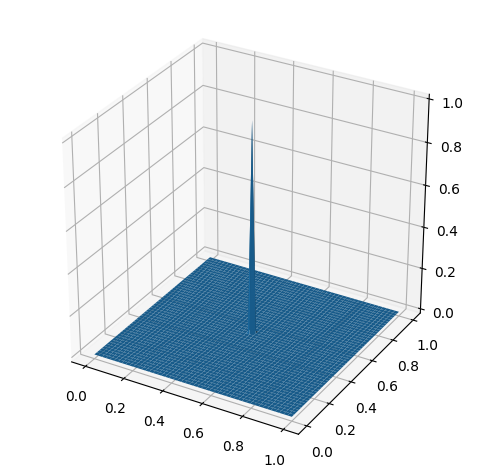

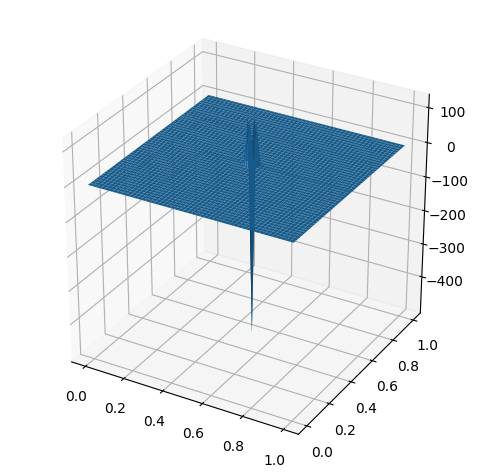

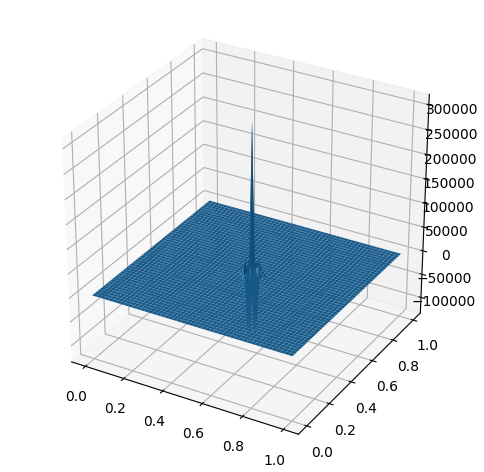

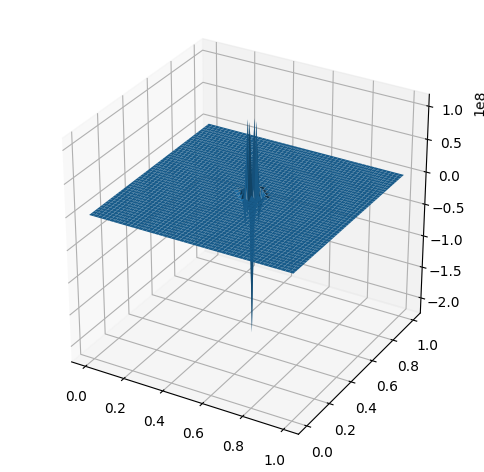

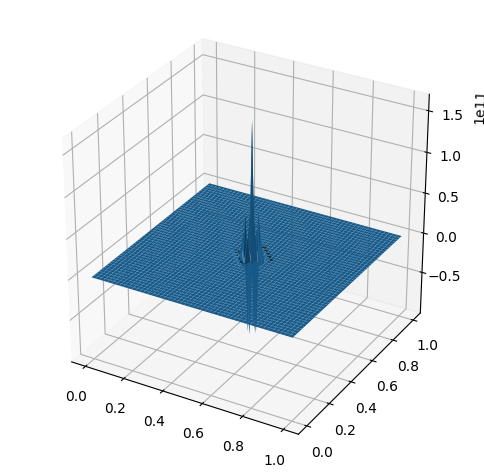

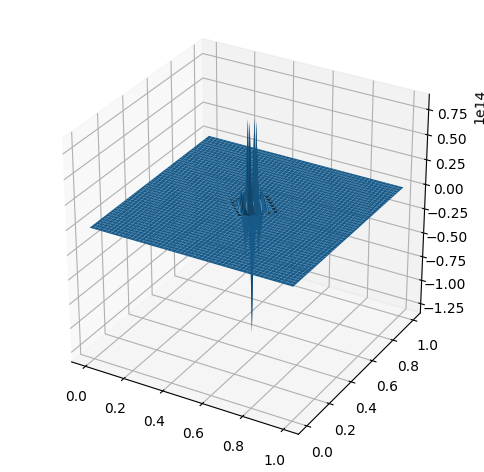

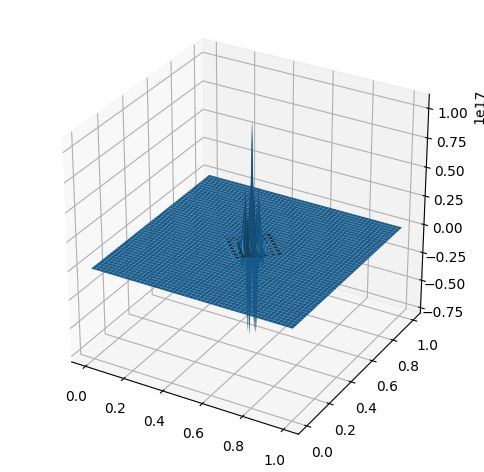

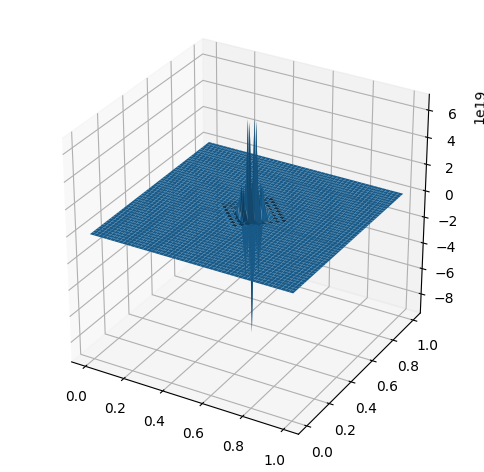

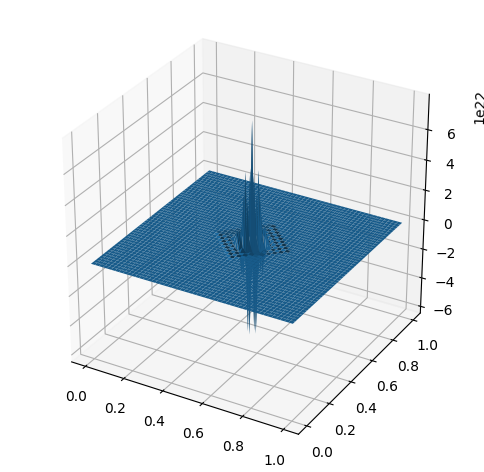

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

#explicit convection-diffusion solver. shows instability due to forward time-stepping,
#easily remedied by backward or Crank-Nicholson stepping

n=50 #x
m=50 #y
t=10

dx=1/n
dy=1/m
dt=1/10000
eps=0.1

x=np.linspace(0,1,n)
y=np.linspace(0,1,m)
x,y=np.meshgrid(x,y)

X=np.zeros((t,n,m))
X[0,int(n/2),int(m/2)]=1

L=np.zeros((n+1,m+1))
filter=np.array([[0,1,0],[1,-4,1],[0,1,0]])
lapL=signal.convolve2d(L,filter)
Ly=(L[:,1:m]-L[:,0:m-1])/dy
Lx=(L[1:n,:]-L[0:n-1,:])/dx

for k in range(t-1):
  for i in range(1,n-1):
    for j in range(1,m-1):
      X[k+1,i,j]=X[k,i,j]+dt*( 1/2*(X[k,i,j]-X[k,i,j-1])/dy*Ly[i,j] + 1/2*(X[k,i,j]-X[k,i-1,j])/dx*Lx[i,j]) +1/2*X[k,i,j]*lapL[i,j]+eps/2*(X[k,i,j+1]+X[k,i,j-1]+X[k,i+1,j]+X[k,i-1,j]-4*X[k,i,j])/(dx*dy)
  fig = plt.figure(figsize=(6,6),dpi=100)
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x,y,X[k,:,:])